In [3]:
import ROOT as R


In [23]:
tot_events = 1.e6
events_per_pulse = 6.25e7
path='/Users/cheng/workspace/Data/musrsim-sms/Nov.21.2021/'
files = {}
fmt='{0:}/output_musr_1003_{1:}.root'
energy_array = ['1p2','2p5','5','10']
thickness_array = ['0p5','1','1p5','2','3','4','5']
gmm_factor_array = ['1em4','1','1e4']
gmm_factors = ['1e3','1e4','1e5','1e6','1e7']

#files for energy scan
for e in energy_array:
    name_tag = '{0:}GeV_1cm_gmm1e4'.format(e)
    files[name_tag] = R.TFile(fmt.format(path,name_tag))
#files for thickness scan
for t in thickness_array:
    if t == '1': 
        continue
    name_tag = '1p2GeV_{0:}cm_gmm1e4'.format(t)
    files[name_tag] = R.TFile(fmt.format(path,name_tag))
#fields for gmm factors comparison
for gmm in gmm_factor_array:
    if gmm == '1e4': 
        continue
    name_tag = '1p2GeV_1cm_gmm{0:}'.format(gmm)
    files[name_tag] = R.TFile(fmt.format(path,name_tag))

#fields for gmm facotors saturability study
for gmm in gmm_factors:
    fmt = '/Users/cheng/workspace/Data/musrsim-sms/output_musr_10000_{0:}.root'
    name_tag = 'gmmStudy_1p2GeV_1cm_gmm{0:}'.format(gmm)        
    files[name_tag] = R.TFile(fmt.format(name_tag),'read')         

In [33]:
def DrawGmmFactorsCmp(mu_type,tmp_f,tmp_h,xRange,title,rebin=0,scale=1.):
    
    hists = {}
    
    color_array = [1,2,4,6,7]
    leg = R.TLegend(0.6,0.55,0.9,0.9)
    c = R.TCanvas()
    maxi = 0.
    gmm_factors = ['1e3','1e4','1e5','1e6','1e7']

    for n,gmm in enumerate(gmm_factors):
        index = gmm.split('e')[1]
        scale = 10.**(-int(index))
        hists[gmm] = files[tmp_f.format(gmm)].Get(tmp_h.format(mu_type)).Clone()                        
        hists[gmm].Scale(scale)
        if rebin>0:
            hists[gmm].Rebin(rebin)
        hists[gmm].SetStats(0)
        hists[gmm].SetTitle(title)

        hists[gmm].SetLineColor(color_array[n])
        hists[gmm].GetXaxis().SetRangeUser(xRange[0],xRange[1])
        hists[gmm].SetLineWidth(4)
        maxi_temp = hists[gmm].GetMaximum()
        if maxi_temp>maxi:
            maxi = maxi_temp
        index = gmm.split('e')[1]
        leg.AddEntry(hists[gmm],'10^{{{0:}}} #sigma_{{#gamma#rightarrow#mu#mu}} '.format(index),'l')

    for gmm in gmm_factors:
        hists[gmm].SetMaximum(maxi*1.2)
        hists[gmm].Draw('same')
    leg.Draw()    
    return c,[hists,leg]

def DrawThicknessCmp(mu_type,tmp_f,tmp_h,xRange,title,rebin=0,scale=1.):
    
    hists = {}
    
    color_array = [1,2,4,6,7]
    leg = R.TLegend(0.6,0.6,0.95,0.9)
    c = R.TCanvas()    
    maxi = 0.
    thickness_array = ['1','3','5']

    for n,thick in enumerate(thickness_array):


        hists[thick] = files[tmp_f.format(thick)].Get(tmp_h.format(mu_type)).Clone()                        
        hists[thick].Scale(scale)
        if rebin>0:
            hists[thick].Rebin(rebin)
        hists[thick].SetStats(0)
        hists[thick].SetTitle(title)

        hists[thick].SetLineColor(color_array[n])
        hists[thick].GetXaxis().SetRangeUser(xRange[0],xRange[1])
        hists[thick].SetLineWidth(4)
        maxi_temp = hists[thick].GetMaximum()
        if maxi_temp>maxi:
            maxi = maxi_temp

        leg.AddEntry(hists[thick],'{0:} cm'.format(thick.replace('p','.')),'l')
        
    for thick in thickness_array:
        hists[thick].SetMaximum(maxi*1.2)
        hists[thick].Draw('histsame')
    leg.Draw()    
    return c,[hists,leg]


def DrawGmmCmp(mu_type,tmp_f,tmp_h,xRange,title,rebin=0,scale=1.):
    hists = {}

    color_array = [1,2,4,6]
    leg = R.TLegend(0.55,0.57,0.92,0.87)
    c = R.TCanvas()
    maxi = 0.
    gmm_factor_array = ['1','1em4','1e4']
    gmmfactors = ['1','10^{-4}','10^{4}']
    for n,gmm in enumerate(gmm_factor_array):
        print tmp_f.format(gmm)
        print tmp_h.format(mu_type)
        try:
            hists[gmm] = files[tmp_f.format(gmm)].Get(tmp_h.format(mu_type)).Clone()
        except ReferenceError:
            hists[gmm] = files[tmp_f.format(gmm_factor_array[n-1])].Get(tmp_h.format(mu_type)).Clone()
            hists[gmm].Reset()
            
        print tmp_h.format(mu_type)
        hists[gmm].Scale(scale)
        if rebin>0:
            hists[gmm].Rebin(rebin)
        hists[gmm].SetStats(0)
        hists[gmm].SetTitle(title)

        hists[gmm].SetLineColor(color_array[n])
        hists[gmm].GetXaxis().SetRangeUser(xRange[0],xRange[1])
        hists[gmm].SetLineWidth(4)
        maxi_temp = hists[gmm].GetMaximum()    
        if maxi_temp>maxi:
            maxi = maxi_temp
        gmmfactor = gmmfactors[n]
        leg.AddEntry(hists[gmm],'{0:}#times#sigma_{{#gamma#rightarrow#mu^{{+}}#mu^{{-}}}}'.format(gmmfactor),'l')
        
    for gmm in gmm_factor_array:
        hists[gmm].SetMaximum(maxi*1.2)
        hists[gmm].Draw('histsame')
    leg.Draw()    
    return c,[hists,leg]


def DrawEnergyCmp(mu_type,tmp_f,tmp_h,xRange,title,rebin=0,scale=1.):
    hists = {}

    color_array = [1,2,4,6]
    leg = R.TLegend(0.7,0.7,0.95,0.95)
    c = R.TCanvas()
    maxi = 0.
    for n,e in enumerate(energy_array):
        print tmp_f.format(e)
        hists[e] = files[tmp_f.format(e)].Get(tmp_h.format(mu_type)).Clone()
        print tmp_h.format(mu_type)
        hists[e].Scale(scale)
        if rebin>0:
            hists[e].Rebin(rebin)
        hists[e].SetStats(0)
        hists[e].SetTitle(title)

        hists[e].SetLineColor(color_array[n])
        hists[e].GetXaxis().SetRangeUser(xRange[0],xRange[1])
        hists[e].SetLineWidth(4)
        maxi_temp = hists[e].GetMaximum()    
        if maxi_temp>maxi:
            maxi = maxi_temp
        leg.AddEntry(hists[e],'{0:} GeV'.format(e.replace('p','.')),'l')
        
    for e in energy_array:
        hists[e].SetMaximum(maxi*1.2)
        hists[e].Draw('Lsame')
    leg.Draw()    
    return c,[hists,leg]





1p2GeV_1cm_gmm1e4
mu_m_energy
2p5GeV_1cm_gmm1e4
mu_m_energy
5GeV_1cm_gmm1e4
mu_m_energy
10GeV_1cm_gmm1e4
mu_m_energy


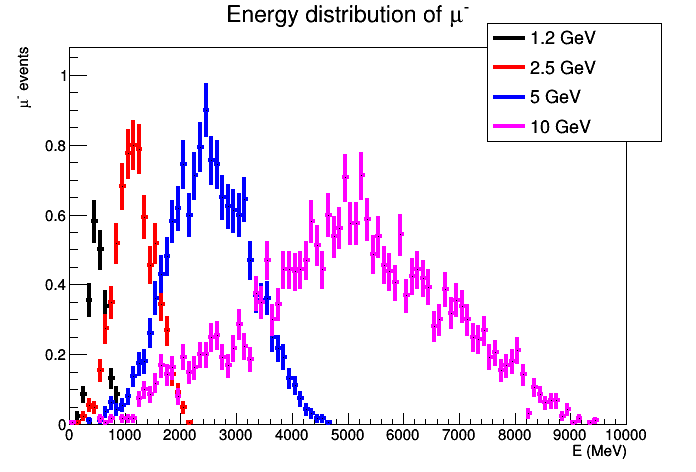

In [6]:
#draw energy distribution
scale = events_per_pulse/tot_events*1.e-4
mu_type = 'm'
tmp_f = '{0:}GeV_1cm_gmm1e4'
tmp_h = 'mu_{0:}_energy'
xRange = [0,10000]
title = 'Energy distribution of #mu^{-};E (MeV);#mu^{-} events'
c,_ = DrawEnergyCmp(mu_type,tmp_f,tmp_h,xRange,title,rebin=10,scale=scale)
c.Draw()


1p2GeV_1cm_gmm1e4
mu_p_energy
2p5GeV_1cm_gmm1e4
mu_p_energy
5GeV_1cm_gmm1e4
mu_p_energy
10GeV_1cm_gmm1e4
mu_p_energy


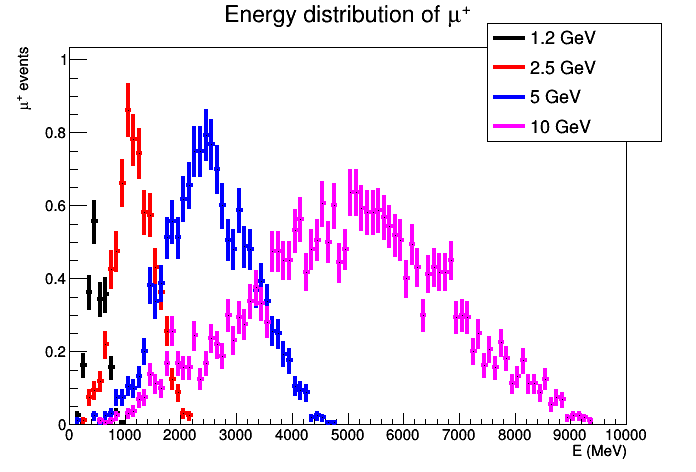

In [7]:
#draw energy distribution
scale = events_per_pulse/tot_events*1.e-4
mu_type = 'p'
tmp_f = '{0:}GeV_1cm_gmm1e4'
tmp_h = 'mu_{0:}_energy'
xRange = [0,10000]
title = 'Energy distribution of #mu^{+};E (MeV);#mu^{+} events'
c,_ = DrawEnergyCmp(mu_type,tmp_f,tmp_h,xRange,title,rebin=10,scale=scale)
c.Draw()



1p2GeV_1cm_gmm1e4
mu_m_angle
2p5GeV_1cm_gmm1e4
mu_m_angle
5GeV_1cm_gmm1e4
mu_m_angle
10GeV_1cm_gmm1e4
mu_m_angle


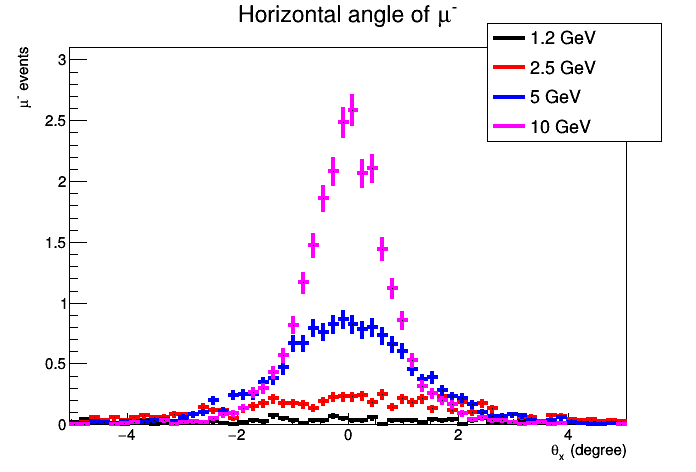

In [8]:
#draw angle distribution
scale = events_per_pulse/tot_events*1.e-4
mu_type = 'm'
tmp_f = '{0:}GeV_1cm_gmm1e4'
tmp_h = 'mu_{0:}_angle'
xRange = [-5,5]
title = 'Horizontal angle of #mu^{-};#theta_{x} (degree);#mu^{-} events'
c,_ = DrawEnergyCmp(mu_type,tmp_f,tmp_h,xRange,title,scale=scale)
c.Draw()

1p2GeV_1cm_gmm1e4
mu_p_angle
2p5GeV_1cm_gmm1e4
mu_p_angle
5GeV_1cm_gmm1e4
mu_p_angle
10GeV_1cm_gmm1e4
mu_p_angle


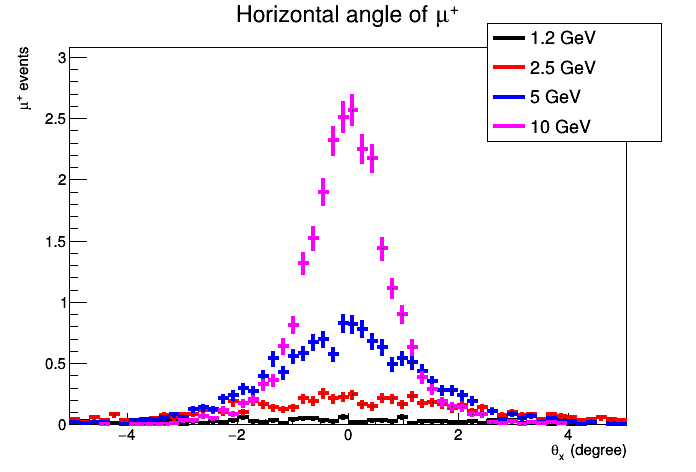

In [9]:
#draw angle distribution
scale = events_per_pulse/tot_events*1.e-4
mu_type = 'p'
tmp_f = '{0:}GeV_1cm_gmm1e4'
tmp_h = 'mu_{0:}_angle'
xRange = [-5,5]
title = 'Horizontal angle of #mu^{+};#theta_{x} (degree);#mu^{+} events'
c,_ = DrawEnergyCmp(mu_type,tmp_f,tmp_h,xRange,title,scale=scale)
c.Draw()

0.5 0.875
1.0 2.0
1.5 2.94375
2.0 3.8625
3.0 4.65625
4.0 5.03125
5.0 5.10625


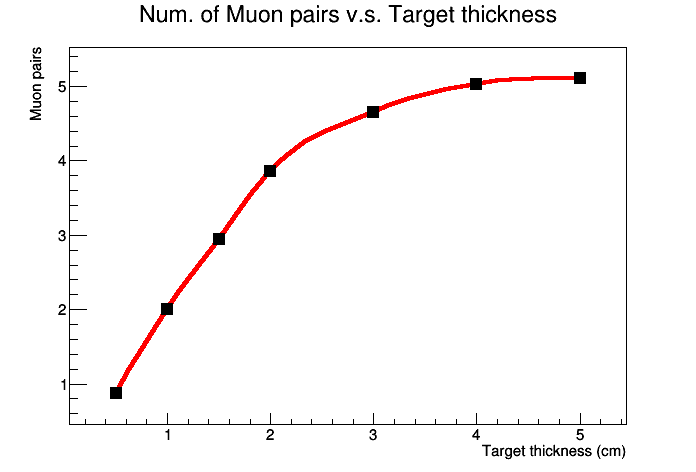

In [10]:
graph = R.TGraph()
graph.SetTitle('Num. of Muon pairs v.s. Target thickness;Target thickness (cm);Muon pairs')
scale = events_per_pulse/tot_events*1.e-4

for n,thick in enumerate(thickness_array):
    y = files['1p2GeV_{0:}cm_gmm1e4'.format(thick)].Get('mu_p_energy').Integral()*scale
    x = float(thick.replace('p','.'))
    print x,y
    graph.SetPoint(n,x,y)
graph.SetMarkerSize(10)    
c = R.TCanvas()
graph.SetLineColor(2);
graph.SetLineWidth(4);
graph.SetMarkerColor(1);
graph.SetMarkerSize(1.5);
graph.SetMarkerStyle(21);
graph.Draw('ACP')
c.Draw()

1.2 2.0
2.5 6.94375
5.0 13.99375
10.0 25.05


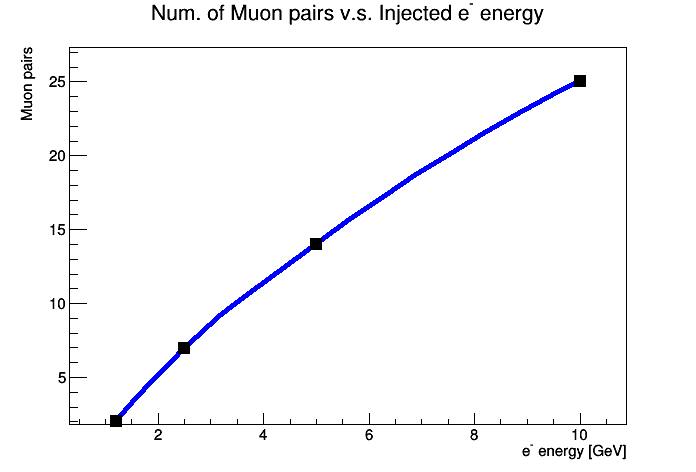

In [11]:
graph = R.TGraph()
graph.SetTitle('Num. of Muon pairs v.s. Injected e^{-} energy;e^{-} energy [GeV];Muon pairs')
scale = events_per_pulse/tot_events*1.e-4

for n,thick in enumerate(energy_array):
    y = files['{0:}GeV_1cm_gmm1e4'.format(thick)].Get('mu_p_energy').Integral()*scale
    x = float(thick.replace('p','.'))
    print x,y
    graph.SetPoint(n,x,y)
graph.SetMarkerSize(10)    
c = R.TCanvas()
graph.SetLineColor(4);
graph.SetLineWidth(4);
graph.SetMarkerColor(1);
graph.SetMarkerSize(1.5);
graph.SetMarkerStyle(21);
graph.Draw('ACP')
c.Draw()

1p2GeV_1cm_gmm1
mu_m_energy
mu_m_energy
1p2GeV_1cm_gmm1em4
mu_m_energy
mu_m_energy
1p2GeV_1cm_gmm1e4
mu_m_energy
mu_m_energy


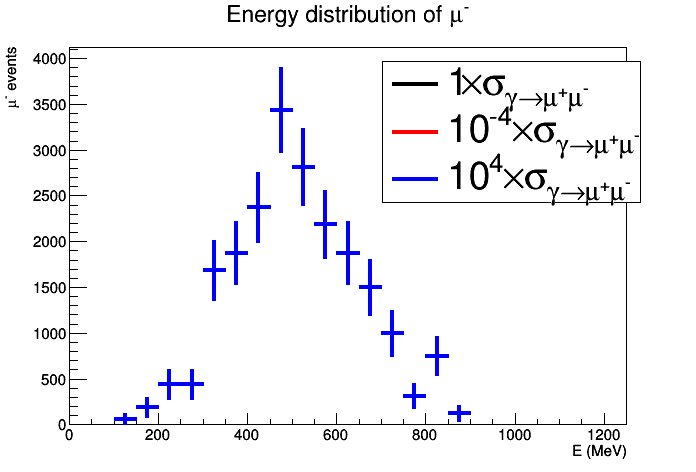

In [22]:
#draw energy distribution
scale = events_per_pulse/tot_events
mu_type = 'm'
tmp_f = '1p2GeV_1cm_gmm{0:}'
tmp_h = 'mu_{0:}_energy'
xRange = [0,1200]
title = 'Energy distribution of #mu^{-};E (MeV);#mu^{-} events'
c,_ = DrawGmmCmp(mu_type,tmp_f,tmp_h,xRange,title,rebin=5,scale=scale)
c.Draw()

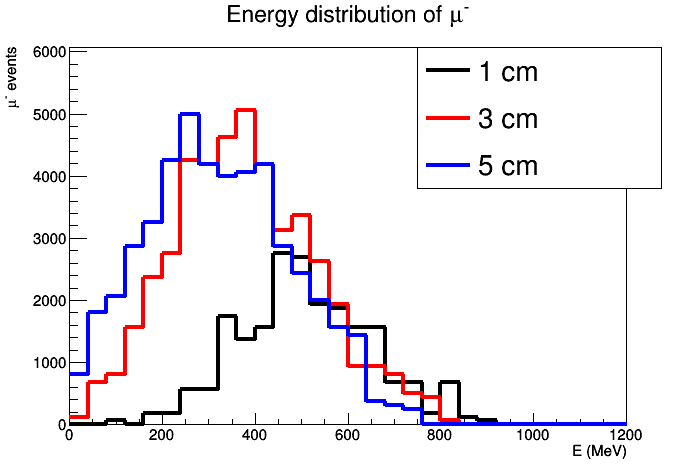

In [13]:
hist.Fill(x,w)

#draw energy distribution
scale = events_per_pulse/tot_events
mu_type = 'm'
tmp_f = '1p2GeV_{0:}cm_gmm1e4'
tmp_h = 'mu_{0:}_energy'
xRange = [0,1200]
title = 'Energy distribution of #mu^{-};E (MeV);#mu^{-} events'
c,_ = DrawThicknessCmp(mu_type,tmp_f,tmp_h,xRange,title,rebin=4,scale=scale)
c.Draw()

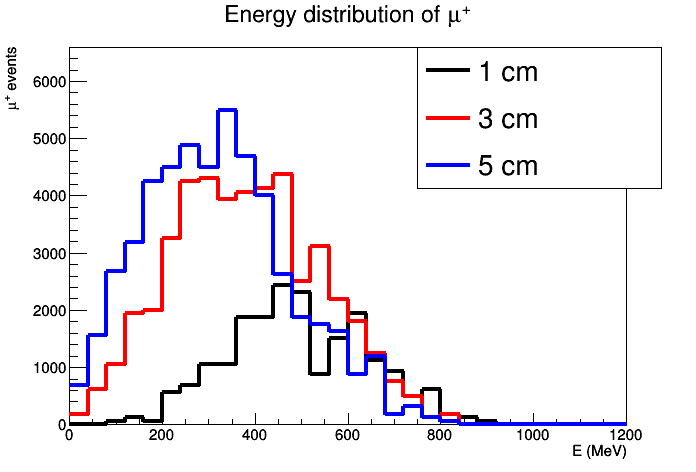

In [14]:
#draw energy distribution
scale = events_per_pulse/tot_events
mu_type = 'p'
tmp_f = '1p2GeV_{0:}cm_gmm1e4'
tmp_h = 'mu_{0:}_energy'
xRange = [0,1200]
title = 'Energy distribution of #mu^{+};E (MeV);#mu^{+} events'
c,_ = DrawThicknessCmp(mu_type,tmp_f,tmp_h,xRange,title,rebin=4,scale=scale)
c.Draw()

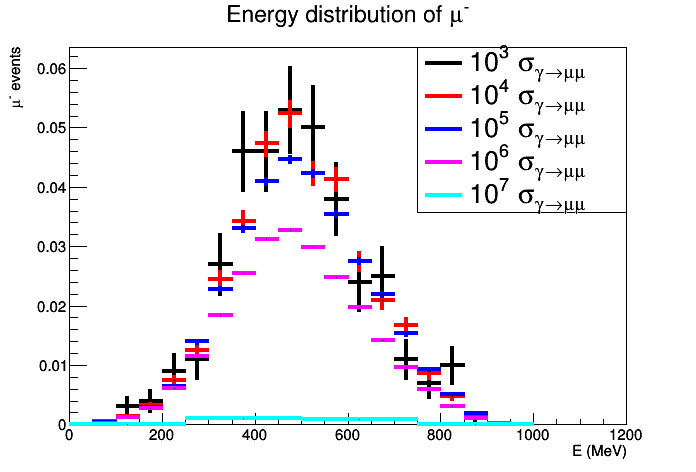

In [34]:
#draw energy distribution
scale = events_per_pulse/tot_events
mu_type = 'm'
tmp_f = 'gmmStudy_1p2GeV_1cm_gmm{0:}'
tmp_h = 'mu_{0:}_energy'
xRange = [0,1200]
title = 'Energy distribution of #mu^{-};E (MeV);#mu^{-} events'
c,_ = DrawGmmFactorsCmp(mu_type,tmp_f,tmp_h,xRange,title,rebin=5)
c.Draw()